In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


df = pd.read_csv('https://github.com/AshishJangra27/datasets/raw/main/GFG%20Articles%20Latest/gfg_articles_clean_data_for_dashboarding.csv')
df.head()

,title,last_updated,last_updated_date,last_updated_month,last_updated_year,clean_tags,day_of_week,no_of_images
0,Capgemini Interview Experience | On-Campus 202...,28 October 2020,28,October,2020,Interview Experiences,Wednesday,0
1,Optum(UHG) Interview Experience for Internship...,28 October 2020,28,October,2020,Interview Experiences,Wednesday,0
2,Amdocs Interview Experience (On-Campus),28 October 2020,28,October,2020,Interview Experiences,Wednesday,0
3,Capgemini Interview Experience | On-Campus (Vi...,27 October 2020,27,October,2020,Interview Experiences,Tuesday,0
4,SRIB Interview Experience for Internship 2020,23 July 2025,23,July,2025,Interview Experiences,Wednesday,0


In [ ]:
#step 1: Read CSV( from link or local path)
import pandas as pd
df = pd.read_csv("path_or_url")

#step 2: View first 5 rows
df.head()

#step 3: View last 5 rows
df.tail()

#step 4: Dataset Information
df.info()

#step 5: Check null values
df.isnull()

#step 6: Count null values column-wise
df.isnull().sum()

#step 7: Drops rows with nulls in specific columns
df.dropna(subset=["column_name"])

#step 8: Check duplicate values
df.duplicated()

#step 9: Drop Duplicate rows based on columns
df.drop_duplicates(subset=["column_name"])
 
#step 10: Select s column
df["column_name"]

#step 11: Unique values in a column.
df["column_name"].unique()

#step 12: Number of Uniques values
df["column_name"].nunique()

# Content Category Analysis

#### 1.1) How many unique content categories (clean_tags) exist in the dataset?

In [2]:
df['clean_tags'].nunique()

598

#### 1.2) Which content categories contribute the highest number of articles?

In [4]:
data = df['clean_tags'].value_counts().head(25)

# Dark futuristic color palette
bar_color = '#2F8D46'  # GeeksforGeeks green
bg_color = '#0F111A'   # Dark space-like background
grid_color = '#1B1E2D' # Slightly lighter grid for contrast
font_color = '#FFFFFF'  # White font for readability

# Create interactive bar chart
fig = go.Figure(data=[
    go.Bar(
        x=data.index,
        y=data.values,
        text=data.values,
        textposition='outside',
        marker=dict(color=bar_color, line=dict(color='#00FF9F', width=1.5)),  # Neon-like outline
        hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
    )
])

# Update layout for dark futuristic theme
fig.update_layout(
    title='Top 25 Clean Tags',
    title_font=dict(family='Courier New, monospace', size=24, color='#00FF9F'),
    plot_bgcolor=bg_color,
    paper_bgcolor=bg_color,
    font=dict(family='Courier New, monospace', size=14, color=font_color),
    xaxis=dict(
        tickangle=-45,
        showgrid=True,
        gridcolor=grid_color,
        zeroline=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor=grid_color,
        zeroline=False
    ),
    margin=dict(l=60, r=30, t=80, b=120),
    hoverlabel=dict(bgcolor='#1B1E2D', font_size=12, font_family='Courier New, monospace')
)

# Add futuristic animation (optional)
fig.update_traces(marker_line_width=1.5)
fig.show()


#### 1.3) What percentage of the overall dataset does each category represent?

In [11]:
total_articles = len(df)

df_ = df['clean_tags'].value_counts().sort_index(ascending = False).reset_index(name='count')


df_ = df['clean_tags'].value_counts().reset_index()
df_.columns = ['tag', 'count']
df_['percentage'] = (df_['count'] / total_articles * 100).round(4)

# Separate top 10 and sum the rest as 'Others'
top_n = 10
top_tags = df_.head(top_n).copy()
others_count = df_['count'][top_n:].sum()
others_percentage = df_['percentage'][top_n:].sum()

# Create a DataFrame for 'Others'
others_df = pd.DataFrame([{'tag': 'Others', 'count': others_count, 'percentage': others_percentage}])

# Combine top tags with Others
top_tags = pd.concat([top_tags, others_df], ignore_index=True)

# Dark futuristic theme colors
bg_color = '#0F111A'
font_color = '#FFFFFF'
colors = ['#2F8D46']*top_n + ['#1F5E30']  # Neon green for top 10, darker green for Others

# Create interactive donut chart
fig = go.Figure(data=[go.Pie(
    labels=top_tags['tag'],
    values=top_tags['percentage'],
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.4,  # makes it a donut
    marker=dict(colors=colors, line=dict(color='#00FF9F', width=1.5)),
    hovertemplate='<b>%{label}</b><br>Percentage: %{value:.2f}%<extra></extra>'
)])

# Update layout for futuristic dark theme
fig.update_layout(
    title='Top 10 Tags with Others',
    title_font=dict(family='Courier New, monospace', size=24, color='#00FF9F'),
    plot_bgcolor=bg_color,
    paper_bgcolor=bg_color,
    font=dict(family='Courier New, monospace', size=14, color=font_color),
    legend=dict(font=dict(family='Courier New, monospace', size=12, color=font_color))
)

fig.show()

#### 1.4) How does the distribution of content categories differ across years?

<Axes: xlabel='clean_tags'>

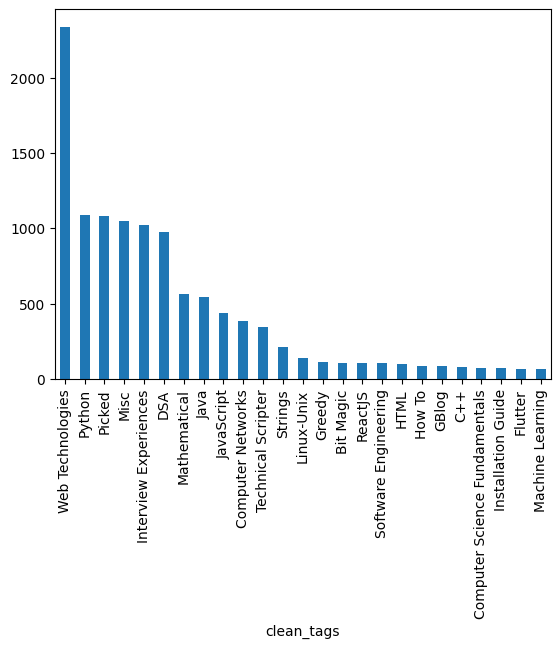

In [12]:
df[df['last_updated_year'] == 2022]['clean_tags'].value_counts().head(25).plot(kind = 'bar')

#### 1.5)Which categories show consistent publishing activity over time?

In [13]:
categories = []

for year in range(2015, 2026):

    categories += list(df[df['last_updated_year'] == year]['clean_tags'].value_counts().head(5).index)

unique_categories = list(set(categories)) 

data = []

for cat in unique_categories:
    counter = 0
    for c in categories:
        if c == cat:
            counter += 1

    data.append([cat, counter]) 

df_ = pd.DataFrame(data, columns = ['category', 'freq'])
df_.sort_values(by = 'freq', ascending=False).head(5)           

,category,freq
8,Interview Experiences,11
14,Python,8
9,Web Technologies,7
3,Picked,5
5,JavaScript,4


#### 1.6) Do certain categories tend to have more images than others?

In [16]:
df_ = df.groupby('clean_tags')['no_of_images'].agg(
      avg_images='mean',
      total_count = 'count' 
).reset_index()

df_[df_['total_count'] > 1500].sort_values(by = 'avg_images', ascending = False)

,clean_tags,avg_images,total_count
192,GBlog,0.855755,2780
499,TechTips,0.843423,1718
312,Linux-Unix,0.833751,1997
536,Web Technologies,0.760171,19689
500,Technical Scripter,0.691243,5561
482,Software Engineering,0.610712,1811
386,Picked,0.607337,26906
111,Computer Networks,0.480385,2906
402,Python,0.460606,17744
300,JavaScript,0.408572,9286


#### 1.7) Are some categories predominently text-only across the dataset?

In [17]:
df_[df_['total_count'] > 100].sort_values(by = 'avg_images', ascending=True).head(10)

,clean_tags,avg_images,total_count
550,Write it Up,0.005450,367
86,Career-Advices,0.008475,826
474,Scala,0.008866,1579
173,Experiences,0.022989,783
18,Admission Experiences,0.025882,425
275,Interview Experiences,0.040709,14100
453,Ruby,0.056868,1143
230,Greedy,0.060000,800
57,Bit Magic,0.066225,604
217,Go Language,0.070724,608


#### 1.8) How does category diversity change as the platform grows in size?

In [18]:
data = []

for year in range(2014, 2026):
    data.append([year, df[df['last_updated_year'] == year]['clean_tags'].nunique()])

df_ = pd.DataFrame(data, columns = ['year', 'freq']) 
df_   

,year,freq
0,2014,1
1,2015,5
2,2016,11
3,2017,23
4,2018,51
5,2019,78
6,2020,104
7,2021,138
8,2022,167
9,2023,242


#### 1.9) Which categories show recent growth based on latest update dates?

In [22]:
categories = []

for year in range(2015,2026):

  categories += list(df[df['last_updated_year'] == year]['clean_tags'].value_counts().head(5).index)


unique_categories = list(set(categories))

data = []

for cat in unique_categories:
  counter = 0
  for c in categories:
    if c == cat:
      counter += 1


  data.append([cat, counter])

df_ = pd.DataFrame(data, columns = ['category','freq'])
df_.sort_values(by = 'freq', ascending = False).head(5)

,category,freq
8,Interview Experiences,11
14,Python,8
9,Web Technologies,7
3,Picked,5
5,JavaScript,4


#### 1.10) Are legacy categories still actively maintained or largely inactive?

In [23]:
df_ = df.groupby('clean_tags').agg(
        min_year=('last_updated_year', 'min'),
        max_year=('last_updated_year', 'max'),
        total_count=('last_updated_year', 'count')
    ).reset_index()

df_ = df_[df_['total_count']>1000]

df_['year_diff'] = df_['max_year'] - df_['min_year']

df_.sort_values(by = 'year_diff', ascending = False).tail()

,clean_tags,min_year,max_year,total_count,year_diff
453,Ruby,2018,2025,1143,7
499,TechTips,2018,2025,1718,7
153,Difference Between,2019,2025,1006,6
474,Scala,2019,2025,1579,6
489,Strings,2019,2025,1664,6


#### 1.11) Can content categories be grouped into broader themes based on publishing behavior?

In [24]:
# ================= Interview / Career =================
interviews_career = [
    'Interview Experiences', 'Interview Tips', 'Interview-Questions',
    'Experiences', 'Work Experiences', 'Campus Experiences',
    'Admission Experiences', 'Competitive Exam Experiences',
    'Contest Experiences', 'Fest Experiences', 'School Experience',
    'Career-Advices', 'Placements', 'placement preparation',
    'CS – Placements', 'Experienced', 'Off-Campus', 'On-Campus',
    'HR', 'HRM', 'Job-A-Thon', 'Exam Tips', 'Reasoning – Placements',
    'interview-preparation', 'Admission Process', 'NDA - SSB',
    'SSB', 'Govt-Exams-Experiences', 'Course Reviews','TCS Digital', 'TCS NQT', 'HackWithInfy',
    'Google Summer Code', 'GSoC', 'Google Girl Hackathon',
    'Google code jam', 'Amazon-WoW', 'Code for Good',
    'HackerRank','ACM-ICPC'
]

# ================= Programming Languages =================
programming_languages = [
    'C++', 'Java', 'Python', 'JavaScript', 'PHP', 'C#',
    'Perl', 'R Language', 'Go Language', 'Rust', 'Ruby',
    'Julia', 'Scala', 'Swift', 'Solidity', 'Dart', 'LISP',
    'Kotlin', 'python', 'Programming Language', 'JS++'
]

# ================= Programming Practice =================
language_programs = [
    'C Programs', 'C++ Programs', 'Java Programs',
    'Python Programs', 'Python numpy-program',
    'C Language', 'cpp-advanced', 'java-basics',
    'java-advanced', 'Kotlin Basics', 'pattern-printing',
    'C++ Quiz'
]

# ================= DSA =================
dsa = [
    'DSA', 'Data Structures', 'Algorithms',
    'Arrays', 'Strings', 'Matrix', 'Stack', 'Queue',
    'Linked List', 'Tree', 'Binary Search Tree',
    'Graph', 'Heap', 'Hash',
    'Sorting', 'Searching', 'Recursion',
    'Backtracking', 'Dynamic Programming', 'Greedy',
    'Divide and Conquer', 'Bit Magic', 'Sliding Window 23',
    'Branch and Bound', 'Randomized', 'STL',
    'Advanced Data Structure', 'Pattern Searching',
    'Analysis of Algorithms',
    'Algorithms-Analysis of Algorithms (Recurrences)',
    'Quick Sort', 'Searching Quiz', 'DSA Quiz',
    'C/C++ Puzzles', 'Puzzles', 'Competitive Programming'
]

# ================= Mathematics =================
mathematics = [
    'Mathematics', 'Engineering Mathematics', 'Mathematical',
    'Combinatorial', 'Game Theory', 'Geometric',
    'Aptitude', 'Logical Puzzles',
    'Analytical Mathematical Puzzles', 'Maths',
    'Maths-Formulas', 'Maths-Calculators', 'permutation',
    'MATLAB', 'Octave-GNU','computer-graphics', 'Computer Graphics'
]

# ================= Core CS =================
cs_core = [
    'Computer Subject', 'Computer Science Fundamentals',
    'Operating Systems', 'Operating Systems Questions',
    'DBMS', 'dbms', 'DBMS-SQL',
    'Computer Networks', 'Computer Networks-Network Layer',
    'Computer Networks-IP Addressing',
    'Compiler Design', 'Theory of Computation',
    'Computer Organization and Architecture',
    'Computer Organization &amp; Architecture',
    'Digital Logic', 'system-programming',
    'Distributed System', 'Design Pattern',
    'System Design', 'Software Engineering',
    'Information-Security', 'secure-coding',
    'cryptography', 'Ethical Hacking',
    'Linux-Unix','GDSC'

]

# ================= Web Development =================
web_development = [
    'HTML', 'HTML5', 'HTML-Questions', 'HTML-Colors', 'HTML-SVG',
    'CSS', 'CSS-Properties', 'JQuery',
    'JavaScript-Questions', 'TypeScript',
    'ReactJS', 'ReactJS-Basics', 'React-Hooks',
    'React-Redux', 'React-Questions', 'react-js',
    'AngularJS', 'Next.js',
    'Web Technologies', 'Web technologies',
    'Web Tech', 'Web technologies-HTML and XML',
    'Web Technologies - Difference Between',
    'Web Templates', 'Frameworks', 'Bootstrap',
    'Material-UI', 'UI Design', 'UI UX Design', 'UX Design',
    'Wordpress', 'Web Scraping', 'Websites & Apps',
    'WebTech-Tools', 'Web-Tech Blogs'
]

# ================= Backend & Frameworks =================
backend_frameworks = [
    'Node.js', 'ExpressJS-Functions', 'ExpressJS-Middlewares',
    'Java-Spring', 'Java-Spring-Boot', 'Java-Spring-MVC',
    'Java-Spring-Security', 'Java-Spring-Cloud',
    'Java-Spring-Data-JPA', 'Java-Spring-Batch',
    'java-servlet', 'Java-JSP', 'java-JVM',
    'Java-Hibernate', 'Java-Object Oriented',
    'rest-framework', 'Maven', 'ASP-Basics',
    'ASP-Methods', 'ASP-Properties', 'VBScript',
    'Web-API', 'Audio-API', 'JSON', 'GraphQL',
    'MERN Stack', 'Mongoose', 'Android', 'Flutter',
    'Flutter UI-components', 'Kotlin Android',
    'Java-Collections', 'Java-Multithreading', 'Java 8',
    'Advance Java', 'Abstract Class and Interface',
    'NodeJS-Questions', 'Java-Sql package',
    'java-swing', 'PHP-Misc', 'Django-Projects',
    'Apache', 'Salesforce', 'selenium','Mobile Computing', 'Software Testing'
]

# ================= Databases =================
databases = [
    'SQL', 'MySQL', 'mysql', 'PostgreSQL', 'postgreSQL',
    'SQL Server', 'SQLServer', 'SQLite', 'MariaDB',
    'DynamoDB', 'MongoDB', 'Firebase',
    'PL/SQL', 'SQL-PL/SQL', 'SQLmysql',
    'JDBC', 'CSV', 'Databases',
    'Elasticsearch', 'Teradata',
    'SQL-Clauses-Operators', 'Data Warehouse', 'Data Types'
]

# ================= AI / ML / DS =================
ai_ml_ds = [
    'Data Science', 'data-science', 'Data Analysis',
    'Data Analytics', 'Data Mining', 'data mining',
    'Machine Learning', 'ML-Statistics', 'ML-EDA',
    'ML-Reinforcement', 'Artificial Intelligence',
    'Artificial-intelligence', 'Deep Learning',
    'Deep-Learning', 'Neural Network',
    'NLP', 'Natural-language-processing',
    'Computer Vision', 'Image-Processing',
    'Generative AI', 'ChatGPT', 'AI Tools',
    'AI News', 'AI Blogs', 'AI Tool Blogs',
    'ChatGPT Blogs', 'ChatGPT Prompts',
    'Hugging Face', 'AI Chatbot',
    'AI-ML-DS With Python', 'Pandas AI',
    'Data Exploration', 'Data Engineering',
     'data', 'R Machine-Learning',
    'R Machine Learning', 'R-Packages',
    'Blockchain', 'Finance'
]

# ================= Python Ecosystem =================
python_ecosystem = [
    'Pandas', 'Numpy', 'Python-pandas', 'Python-numpy',
    'Python pandas-dataFrame', 'Python pandas-series',
    'Python pandas-basics', 'Python-matplotlib',
    'Python-Seaborn', 'Python-scipy',
    'Python-nltk', 'Python-PyTorch', 'Python-Tensorflow',
    'Tensorflow', 'Tensorflow.js',
    'Python-Altair', 'Python-Bokeh',
    'Python-Plotly', 'Python-Pyspark',
    'Python-OpenCV', 'OpenCV',
    'python-modules', 'python-regex',
    'python-os-module', 'Python-Library',
    'Python-Data-Analysis', 'python-utility',
    'Python Django', 'Python Flask',
    'Python Framework', 'Python-selenium',
    'Python-projects', 'Python-PyQt',
    'Python-multithreading', 'Python scikit-module'
]

# ================= Cloud & DevOps =================
cloud_devops = [
    'Cloud Computing', 'Cloud-Computing',
    'Amazon Web Services', 'AWS', 'aws-iam',
    'aws-ec2', 'aws-elastic-beanstalk',
    'Google Cloud Platform', 'Google-Cloud-Platform',
    'google-cloud-app-engine',
    'google-cloud-kubernetes-engine',
    'Microsoft Azure', 'azure',
    'Docker', 'docker', 'Docker Container',
    'Kubernetes', 'Kubernetes-Basics',
    'Hadoop', 'Apache Kafka', 'Apache-Hive',
    'MapReduce', 'BigData', 'virtualization',
    'Cloud Lending', 'DevOps'
]

# ================= Projects & Tools =================
projects_tools = [
    'Project', 'Project-Ideas', 'Web Development Projects',
    'Deep Learning Projects', 'Computer Vision Projects',
    'NLP-Projects', 'Open Source',
    'Internship', 'Installation Guide',
    'Git', 'GIT', 'GitHub', 'Postman',
    'Postman-API-Testing', 'Excel', 'excel',
    'Tableau', 'Power BI', 'Utilities',
    'Converter-Tools', 'Calculator-tools',
    'Image-Tools', 'Image-Converter',
    'PDF-Converter', 'Online-Game-Tools',
    'DSA Online Tools/Converters', 'Tools',
    'Chrome', 'Data Visualization'
]

# ================= Companies =================
companies = [
    'Amazon', 'Google', 'Microsoft', 'IBM', 'Oracle',
    'Goldman Sachs', 'Bank of America', 'Morgan Stanley',
    'JP Morgan', 'Deloitte', 'Accenture', 'TCS',
    'Infosys', 'Wipro', 'Cognizant', 'Capgemini',
    'Flipkart', 'Samsung', 'Airtel', 'Reliance',
    'Visa', 'HSBC', 'SBI', 'Zoho', 'Red Hat',
    'Cisco', 'GE', 'Siemens', 'Qualcomm',
    'Barclays', 'Deutsche Bank', 'Credit Suisse',
    'Fidelity Investments', 'Fidelity International',
    'Thoughtworks', 'Persistent Systems',
    'Tech Mahindra', 'Facebook', 'Netflix',
    'Renault-Nisaan', 'BrowserStack', 'Volkswagen IT Services',
    'Ola Cabs', 'Dell','Unacademy', 'Genpact', 'ISRO', 'Virtusa', 'Finastra',
    'Pwc', 'HCL', 'CRIS', 'Nagarro', 'Hexaware Technologies',
    'Sopra Steria', 'BARC', 'GoJek', 'KPIT', 'Tata Steel',
    'Apisero', 'Perfios', 'To The New', 'Verifone',
    'Incture Technologies', 'Optum', 'FavTutor',
    'o9 Solutions', 'Robert Bosch', 'DXC Technology',
    'DRDO', 'MAQ', "Byju's", 'BIT', 'ATMECS',
    'Infinite Computer Solutions', 'TSS Consultancy',
    'Mallow Technologies','Aakash-Byjus','SalesFor'
]

# ================= Education =================
education = [
    'IIT Delhi', 'IIT Bombay', 'IIT Madras', 'IIT Kanpur',
    'IIT Kharagpur', 'IIT Hyderabad', 'IIT Jodhpur',
    'IIT Patna', 'IIT Guwahati', 'IIIT Delhi',
    'IIIT Hyderabad', 'IIIT Bhubaneswar',
    'BITS Pilani', 'IISc Bangalore',
    'Lovely Professional University',
    'Poornima College of Engineering',
    'NIT Patna', 'AKTU', 'SRM', 'VIT-AP',
    'GATE', 'GATE CS', 'GATE-GATE IT 2004',
    'IIT JEE', 'IIT- JEE', 'NEET', 'UGC-NET',
    'UPSC', 'SSC/Banking', 'GRE', 'SAT',
    'WBJEE', 'NPTEL', 'BCA',
    'Class 8', 'Class 9', 'Class 10', 'Class 11', 'Class 12',
    'CBSE - Class 11', 'CBSE - Class 12',
    'NCERT Solutions Class-10', 'NCERT Solutions Class-8',
    'Education & Exams', 'School Learning', 'Biology',
    'Social Science', 'Chemistry', 'English', 'Commerce',
    'Geography-MAQ', 'Economics-Class 10',
    'Political Science-Class 10',
    'CBSE-Answer Keys', 'AKTU-question-papers',
    'MHTCET', 'Coaching Centers', 'SATI',
    'SSC Finance and Economics',
    'SSC Geography',
    'Aptech Kolkata', 'aakash', 'Tejas Network', 'PSTakeCare'
]

# ================= Content & Events =================
content_events = [
    'GBlog', 'GBlog 2024', 'GBlog 2025',
    'Articles', 'Tutorials', 'Blogs', 'blogs',
    'Technical Scripter', 'Technical Scripter 2018',
    'Technical Scripter 2019', 'Technical Scripter 2020',
    'Technical Scripter 2022', 'Dev Scripter 2024',
    'Write it Up', 'Write It Up 2024',
    'Blogathon', 'Blogathon-2021',
    'Geeks Premier League', 'Geeks Premier League 2023',
    'Geeks-Premier-League-2022',
    'GFG Academy', 'GFG-Course',
    'GeeksforGeeks', 'GeeksforGeeks Initiatives',
    'GeeksforGeeks-Contests', 'event',
    'News', 'Spotlight', 'RSS', 'Roadmap',
    'Best Apps', 'Outlook Tips', 'Blogger',
    'Google Sites', 'Write From Home', 'TechTips', 'Full Form', 'How To', 'Difference Between',
    'difference', 'AI-ML-DS Blogs', 'General Knowledge',
    'Game Quiz', 'Current GK'
]

electronics = [
    'VLSI', 'Electronics Engineering', 'Verilog-HDL',
    'Electronics', 'Arduino-projects', 'IoT',
    'microprocessor', 'Robotics', 'Microchip',
    'fuzzy-logic','Electronics'
]

misc = [
    'TrueGeek-2021', 'progeek', 'Algo-Geek 2021',
    'Algo Geek', 'ProGeek 2.0', 'ProGeek 2021',
    'ProGeek', 'Elite-Batch-2022', 'Coders-Journey','Misc','misc'
]


df['broader_category'] = np.where(df['clean_tags'].isin(interviews_career), 'Interview/Career', df['clean_tags'])
df['broader_category'] = np.where(df['clean_tags'].isin(programming_languages), 'Programming Languages', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(language_programs), 'Programming Practice', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(dsa), 'DSA', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(mathematics), 'Mathematics', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(cs_core), 'Core CS Subjects', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(web_development), 'Web Development', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(backend_frameworks), 'Backend & Frameworks', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(databases), 'Databases', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(ai_ml_ds), 'AI / ML / Data Science', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(python_ecosystem), 'Python Ecosystem', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(cloud_devops), 'Cloud & DevOps', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(projects_tools), 'Projects & Tools', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(companies), 'Companies', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(education), 'Education & Exams', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(content_events), 'Content & Events', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(electronics), 'Electronics', df['broader_category'])
df['broader_category'] = np.where(df['clean_tags'].isin(misc), 'Misc', df['broader_category'])

df

,title,last_updated,last_updated_date,last_updated_month,last_updated_year,clean_tags,day_of_week,no_of_images,broader_category
0,Capgemini Interview Experience | On-Campus 202...,28 October 2020,28,October,2020,Interview Experiences,Wednesday,0,Interview/Career
1,Optum(UHG) Interview Experience for Internship...,28 October 2020,28,October,2020,Interview Experiences,Wednesday,0,Interview/Career
2,Amdocs Interview Experience (On-Campus),28 October 2020,28,October,2020,Interview Experiences,Wednesday,0,Interview/Career
3,Capgemini Interview Experience | On-Campus (Vi...,27 October 2020,27,October,2020,Interview Experiences,Tuesday,0,Interview/Career
4,SRIB Interview Experience for Internship 2020,23 July 2025,23,July,2025,Interview Experiences,Wednesday,0,Interview/Career
...,...,...,...,...,...,...,...,...,...
174245,Specify Multiple Arguments in apply Functions ...,14 September 2021,14,September,2021,Picked,Tuesday,0,Picked
174246,Keep Original Row Order when Merging DataFrame...,14 September 2021,14,September,2021,Picked,Tuesday,0,Picked
174247,How to remove a directory in R?,14 September 2021,14,September,2021,Picked,Tuesday,0,Picked
174248,Format Dates in Flutter,21 April 2025,21,April,2025,Flutter,Monday,1,Backend & Frameworks
